In [1]:
start = "H:/.Учёба/.Курсач/"
SPORT = start + "BD_articles/SportArticles"
MEDIC = start + "BD_articles/MedArticles"
MATH = start + "BD_articles/MathArticles"
testSPORT = start + "BD_Med_Sport_Math/Sport"
testMEDIC = start + "BD_Med_Sport_Math/Med"
testMATH = start + "BD_Med_Sport_Math/Math"

In [22]:
from tqdm import tqdm
import os

data = []
LABELS = {SPORT: 0, MEDIC: 1, MATH: 2}

for label in LABELS:
            for f in tqdm(os.listdir(label)):
                if("_Ref" not in f):
                    # try:
                        tmp = {}
                        path = os.path.join(label, f)
                        #прочитать тексты и запомнить откуда они
                        with open(path, "r", encoding = 'utf-8') as inpt:
                            words = inpt.read()
                            
                            
                            
                            tmp["text"] = words
                            tmp["sourse"] = label
                            tmp["label"] = np.eye(3)[LABELS[label]]
                            # print(tmp)
                            data.append(tmp)

100%|██████████| 77/77 [00:00<00:00, 1603.80it/s]


In [23]:

testLABELS = {testSPORT: 0, testMEDIC: 1, testMATH: 2}
testdata = []

for label in testLABELS:
            for f in tqdm(os.listdir(label)):
                if("_" in f):
                    # try:
                        tmp = {}
                        path = os.path.join(label, f)
                        #прочитать тексты и запомнить откуда они
                        with open(path, "r", encoding = 'utf-8') as inpt:
                            words = inpt.read()
                            
                            
                            
                            tmp["text"] = words
                            tmp["sourse"] = label
                            tmp["label"] = np.eye(3)[testLABELS[label]]
                            # print(tmp)
                            testdata.append(tmp)

100%|██████████| 62/62 [00:00<00:00, 1589.68it/s]


In [41]:
import numpy as np

train = np.array([i["text"] for i in data])
y_train = np.array([i["label"] for i in data])
test = np.array([i["text"] for i in testdata])
y_test = np.array([i["label"] for i in testdata])


In [48]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train)

X_train = tokenizer.texts_to_sequences(train)
X_test = tokenizer.texts_to_sequences(test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index


In [49]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 5000

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[  8  20 115 ...   0   0   0]


In [53]:
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 5000, 50)          2386400   
_________________________________________________________________
flatten_4 (Flatten)          (None, 250000)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                2500010   
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 33        
Total params: 4,886,443
Trainable params: 4,886,443
Non-trainable params: 0
_________________________________________________________________


In [54]:
import matplotlib.pyplot as plt

def plot_history(history):
        plt.style.use('ggplot')
        acc = history.history['acc']
        val_acc = history.history['val_acc']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, 'b', label='Training acc')
        plt.plot(x, val_acc, 'r', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, 'b', label='Training loss')
        plt.plot(x, val_loss, 'r', label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()

In [55]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9970
Testing Accuracy:  0.7271


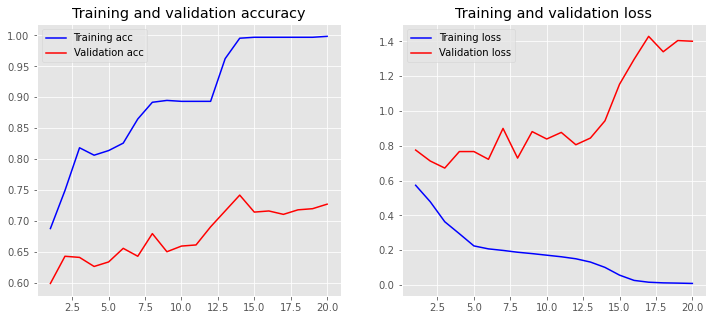

In [56]:
plot_history(history)

In [57]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 5000, 50)          2386400   
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 50)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 33        
Total params: 2,386,943
Trainable params: 2,386,943
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.8553


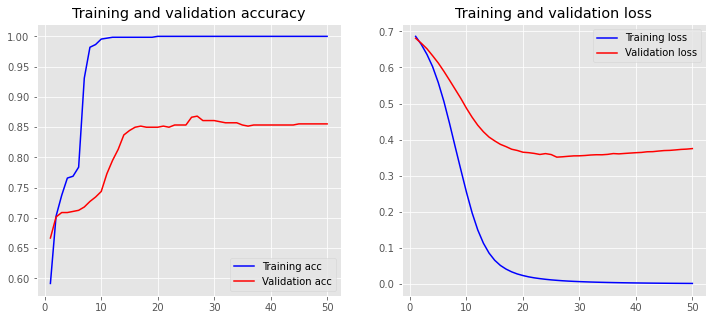

In [58]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


In [61]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 5000, 100)         4772800   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4996, 128)         64128     
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 33        
Total params: 4,838,251
Trainable params: 4,838,251
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.7399


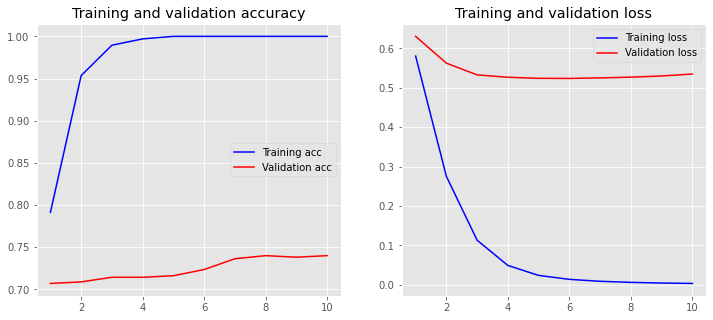

In [62]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)
